# EDA - Haberman's Cancer Survial

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("haberman.csv")
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
df.columns = ["age", "operation_year","axillary_lymph_node", "survival_status"]

In [6]:
df.head()

,age,operation_year,axillary_lymph_node,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
df.shape

(305, 4)

In [9]:
df.columns

Index(['age', 'operation_year', 'axillary_lymph_node', 'survival_status'], dtype='object')

In [11]:
 print(df.info())

#brief info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  305 non-null    int64
 1   operation_year       305 non-null    int64
 2   axillary_lymph_node  305 non-null    int64
 3   survival_status      305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [12]:
df['survival_status'] = df['survival_status'].map({1:'Yes', 2:'No'})
df.head()

,age,operation_year,axillary_lymph_node,survival_status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


Survival Status(class attribute)

1 = the patient survied
2= the patient died within 5 years

In [13]:
df.describe()
#describe the dataset

,age,operation_year,axillary_lymph_node
count,305.000000,305.000000,305.000000
mean,52.357377,62.868852,4.032787
std,10.678010,3.242783,7.200528
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.000000,66.000000,4.000000
max,78.000000,69.000000,52.000000


In [14]:
df['survival_status'].value_counts()

Yes    225
No      80
Name: survival_status, dtype: int64

In [15]:
status_yes = df[df['survival_status'] =='Yes']
status_yes.describe()

,age,operation_year,axillary_lymph_node
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [37]:
status_no = df[df['survival_status'] =='No']
status_yes.describe()

,age,operation_year,axillary_lymph_node
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


## 1. Univariate Analysis - Histogram

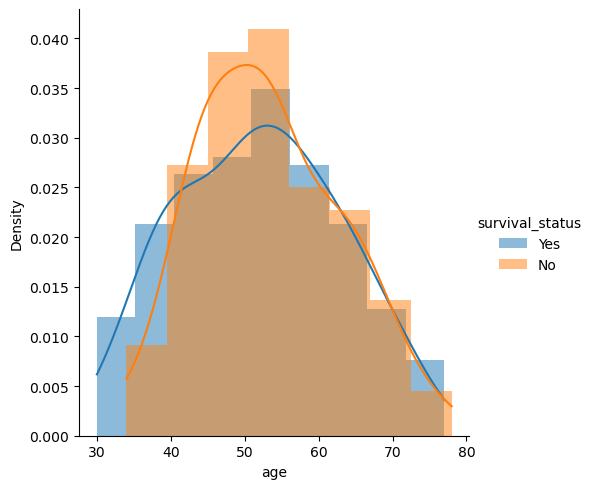

In [22]:
sns.FacetGrid(df, hue='survival_status', height=5).map(sns.histplot,'age', label="100% Equities",kde=True, stat="density", linewidth=0).add_legend()
plt.show()

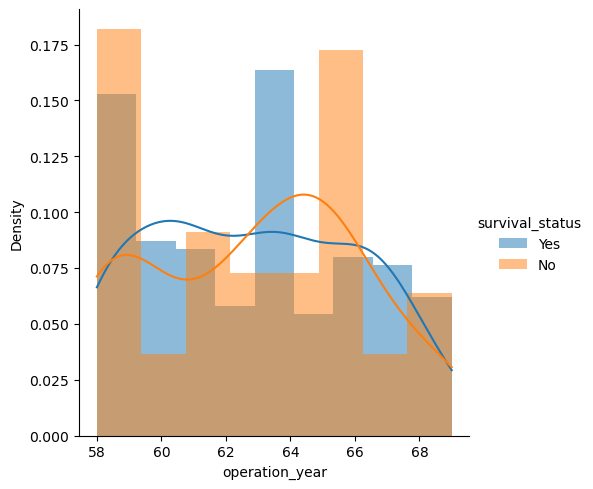

In [23]:
sns.FacetGrid(df, hue='survival_status', height=5).map(sns.histplot,'operation_year', label="100% Equities",kde=True, stat="density", linewidth=0).add_legend()
plt.show()

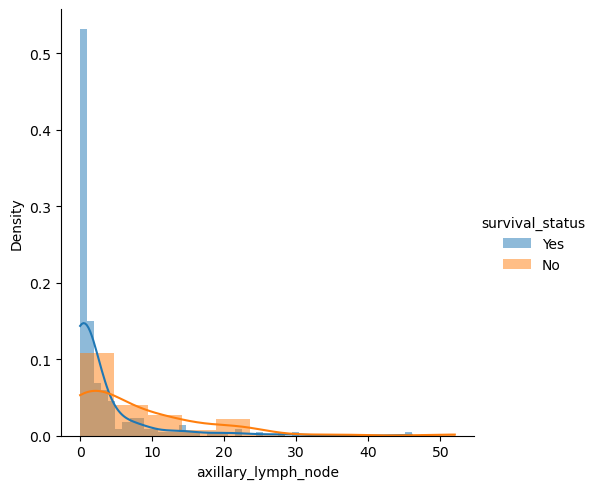

In [28]:
sns.FacetGrid(df, hue='survival_status', height=5).map(sns.histplot,'axillary_lymph_node', label="100% Equities",kde=True, stat="density", linewidth=0).add_legend()
plt.show()

## CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
***********************************************************
[0.5625 0.15   0.1375 0.05   0.075  0.     0.0125 0.     0.     0.0125]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


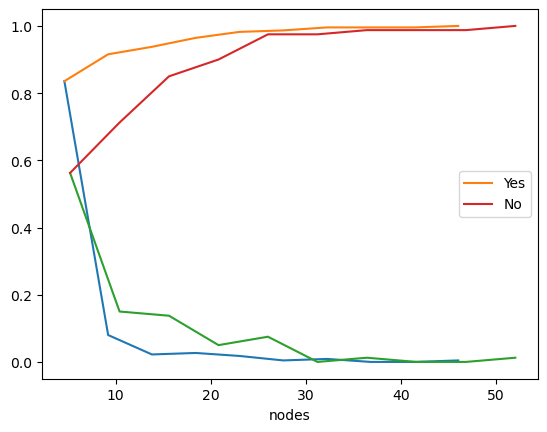

In [40]:
counts1, bin_edges1 = np.histogram(status_yes['axillary_lymph_node'], bins=10, density=True)
pdf1 = counts1/(sum(counts1))
print(pdf1)
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label='Yes')
plt.xlabel('nodes')
print("***********************************************************")
counts2, bin_edges2 = np.histogram(status_no['axillary_lymph_node'], bins=10, density=True)
pdf2 = counts2/(sum(counts2))
print(pdf2)
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label='No')
plt.legend()
plt.show()

## Box Plot

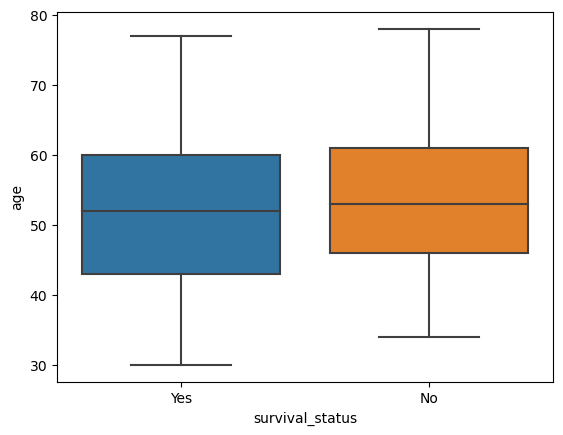

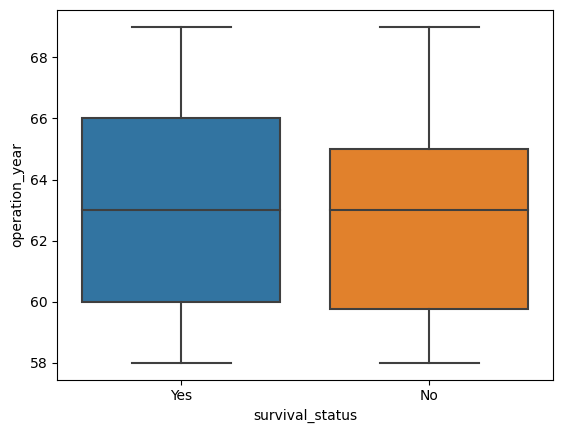

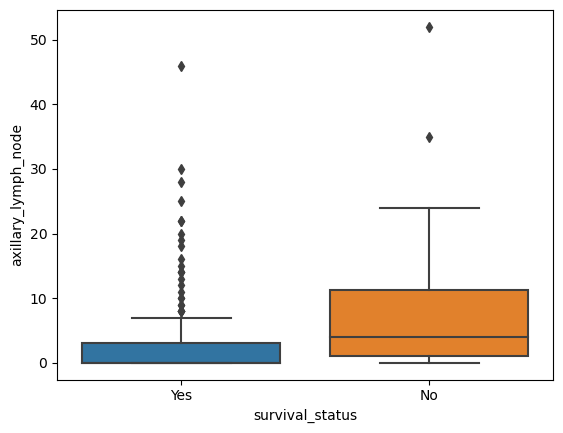

In [43]:
sns.boxplot(x='survival_status', y='age', data=df)
plt.show()

sns.boxplot(x='survival_status', y='operation_year', data=df)
plt.show()

sns.boxplot(x='survival_status', y='axillary_lymph_node', data=df)
plt.show()

## Violin Plot

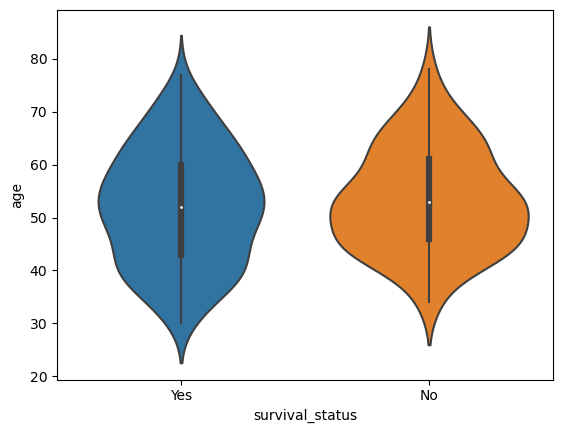

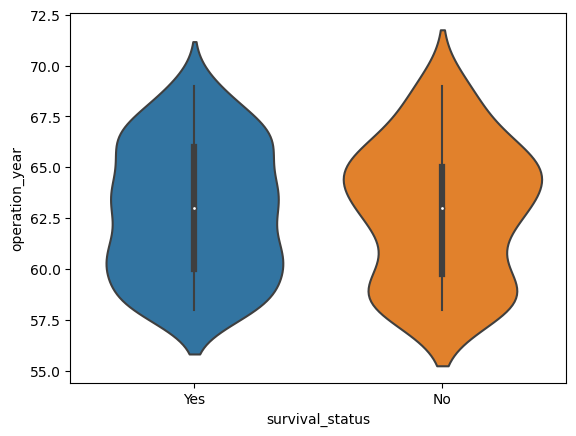

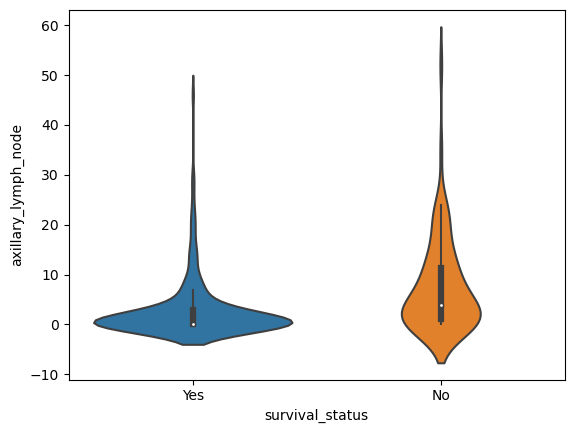

In [44]:
sns.violinplot(x='survival_status', y='age', data=df)
plt.show()

sns.violinplot(x='survival_status', y='operation_year', data=df)
plt.show()

sns.violinplot(x='survival_status', y='axillary_lymph_node', data=df)
plt.show()

## Pair Plot

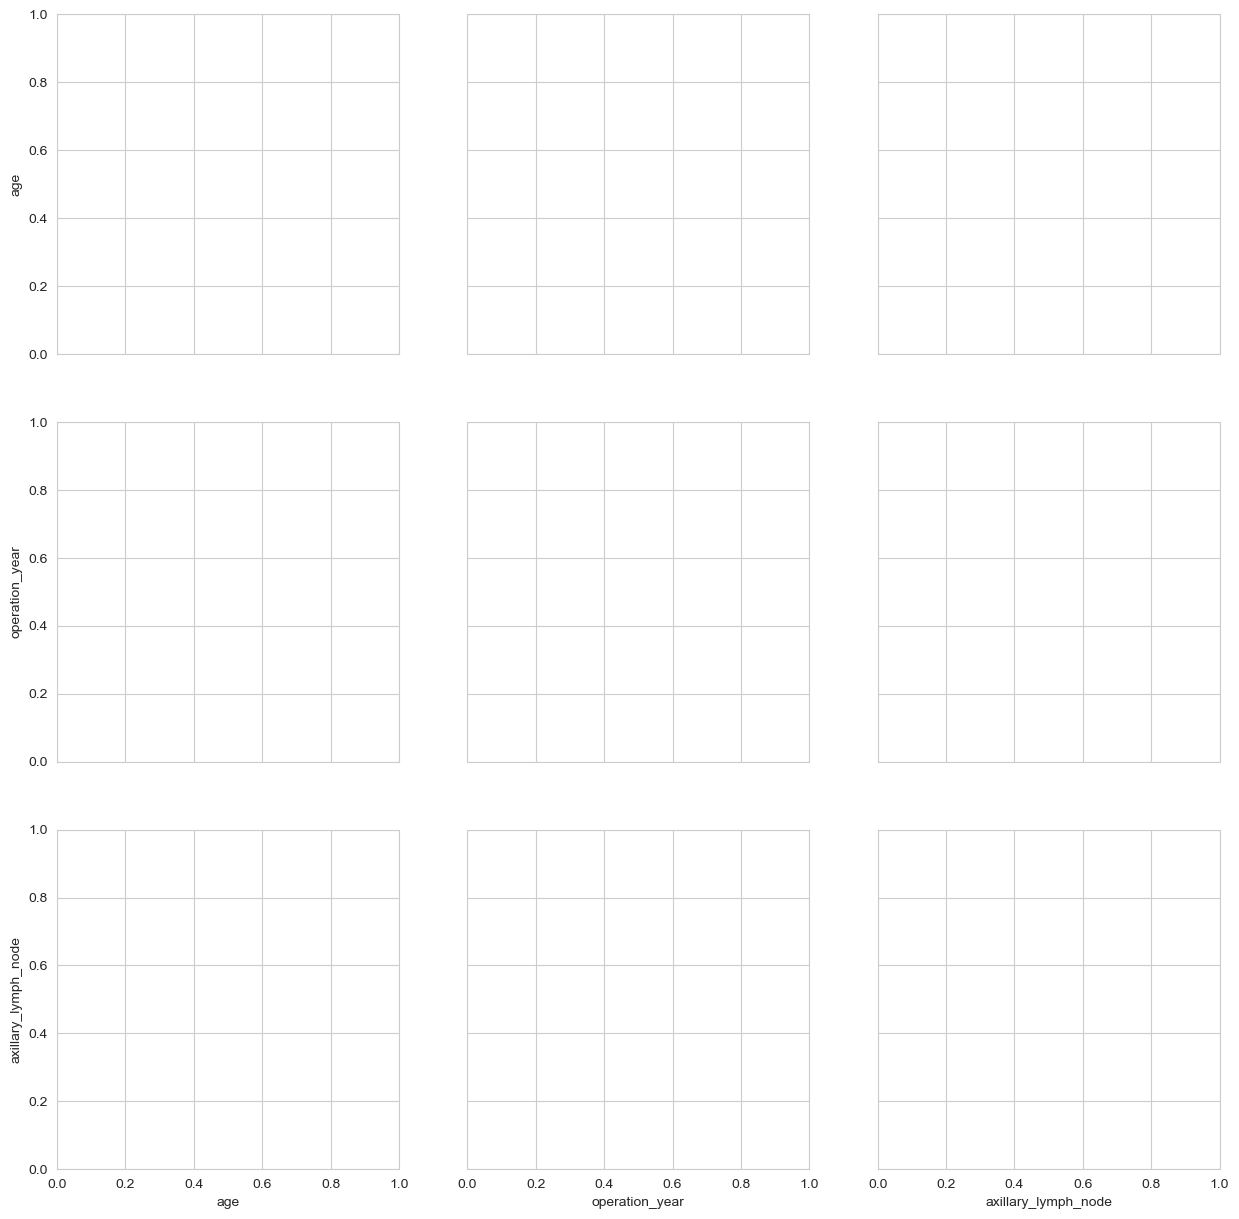

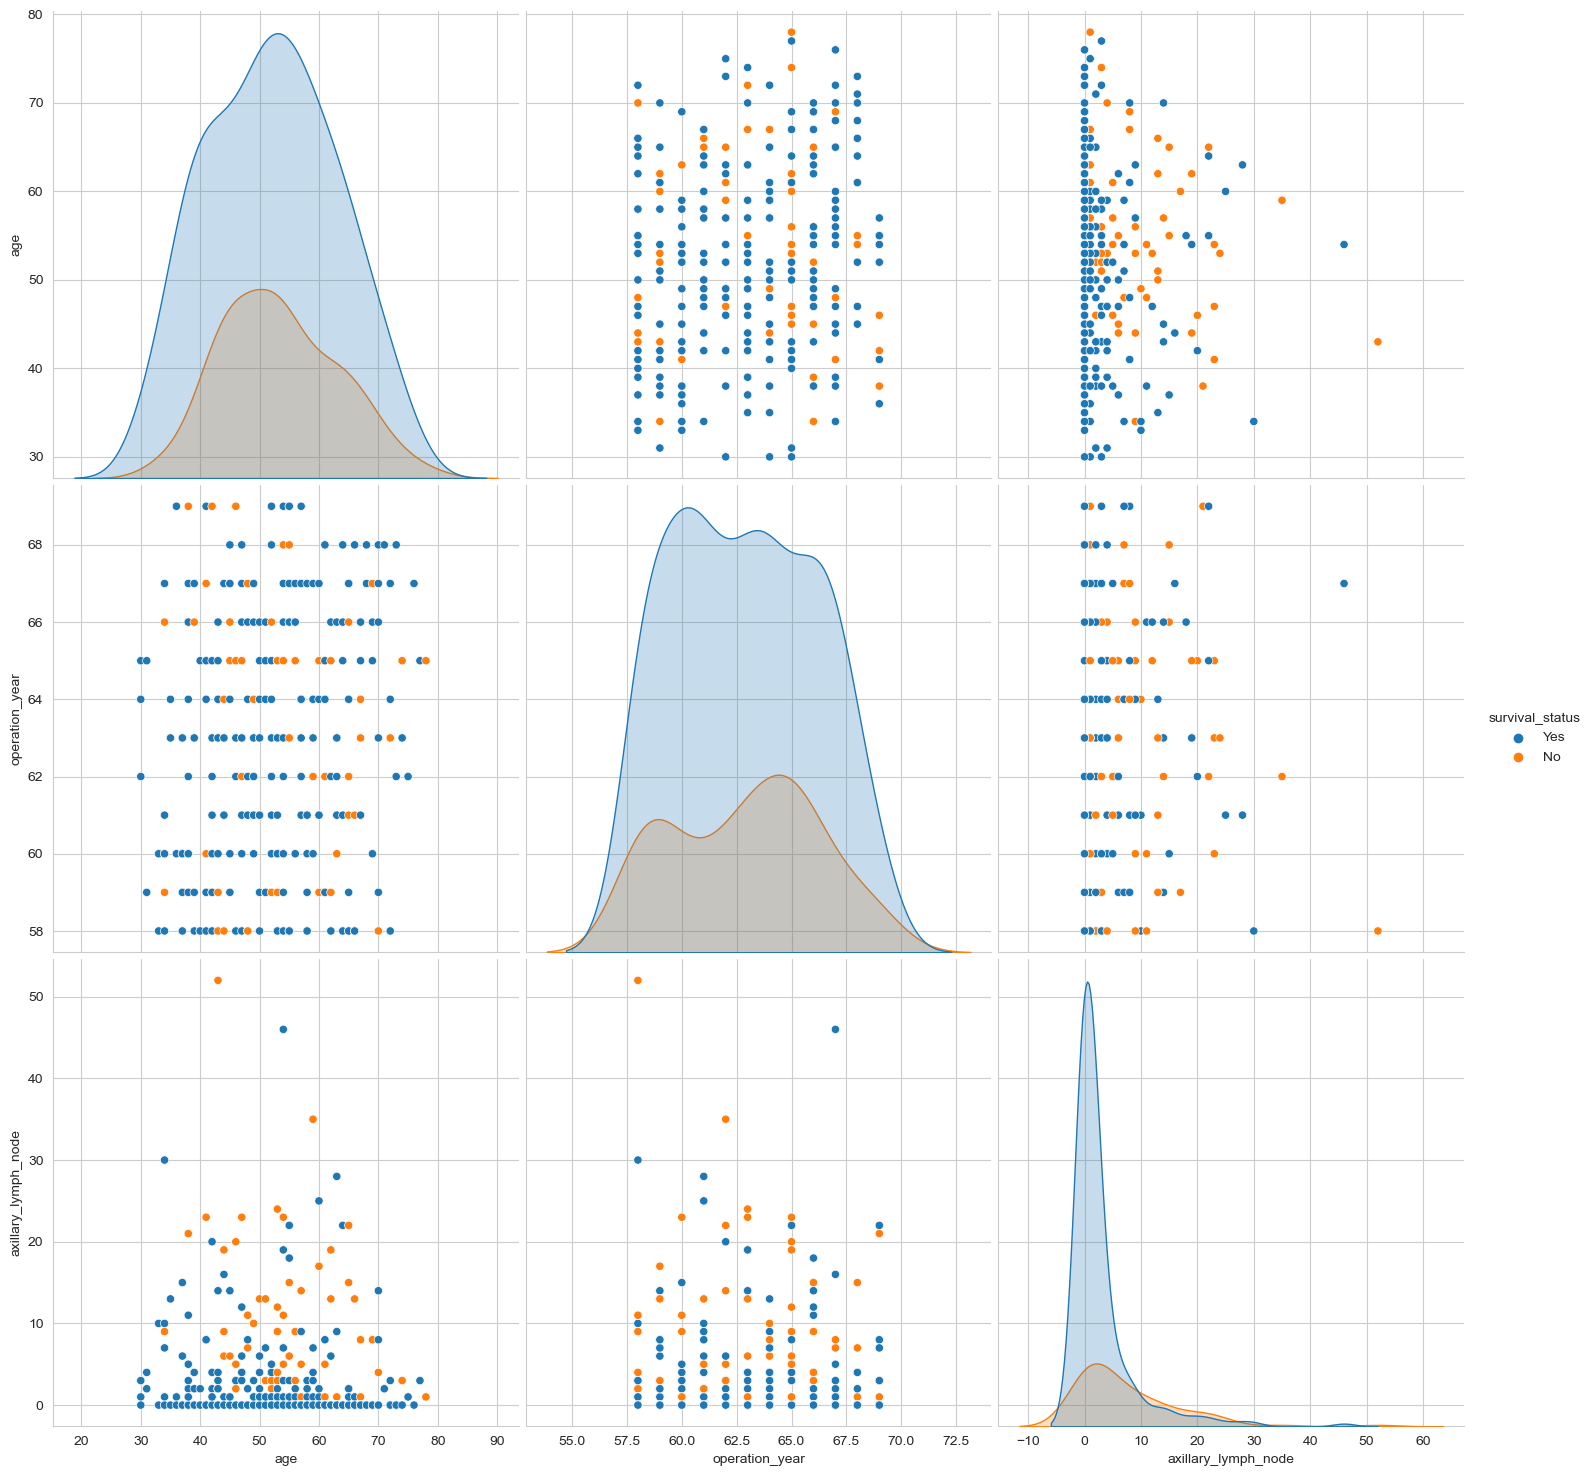

In [46]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='survival_status', height=5)
plt.show()

## Multivariate Analysis

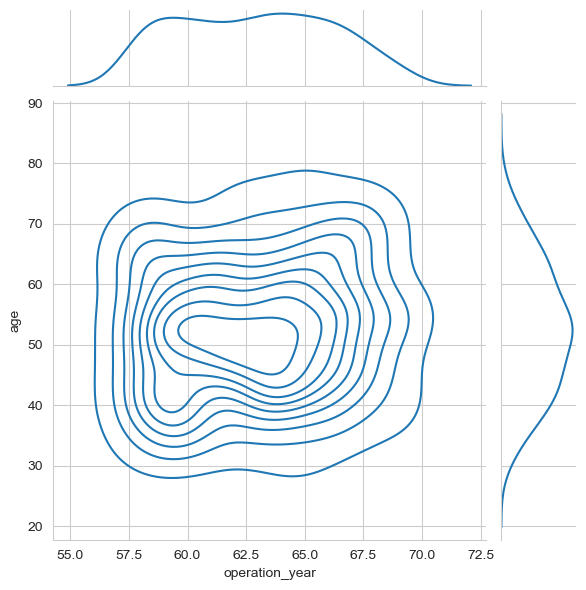

In [47]:
sns.jointplot(x='operation_year', y='age', data=df, kind='kde')
plt.show()